<a href="https://colab.research.google.com/github/JeffersonCespedes05/Repositorio_corte_3/blob/main/DATOS_INDUSTRIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
datos=pd.read_excel('/content/drive/MyDrive/CARPETA ESTADISTICA/C3/datos_industrias.xlsx')
datos.head()

,Tasa_Crecimiento,Inversión_Tecnología,Aumento_salario,Antigüedad(años),Estrategias,Empleados,Salario
0,0.00632,2.31,0.538,6.575,1,74.0,1300500.0
1,0.02731,7.07,0.469,6.421,2,60.5,1513000.0
2,0.02729,7.07,0.469,7.185,2,60.5,1513000.0
3,0.03237,2.18,0.458,6.998,3,55.5,1589500.0
4,0.06905,2.18,0.458,7.147,3,55.5,1589500.0


In [ ]:
datos.shape

(506, 7)

                            OLS Regression Results                            
Dep. Variable:       Tasa_Crecimiento   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     46.26
Date:                Tue, 20 May 2025   Prob (F-statistic):           2.94e-11
Time:                        14:25:59   Log-Likelihood:                -1784.1
No. Observations:                 506   AIC:                             3572.
Df Residuals:                     504   BIC:                             3581.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.6469      3.147     -5.607      0.0

<ipython-input-8-9e9d5e32c43e>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercepto = modelo.params[0]
<ipython-input-8-9e9d5e32c43e>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pendiente = modelo.params[1]


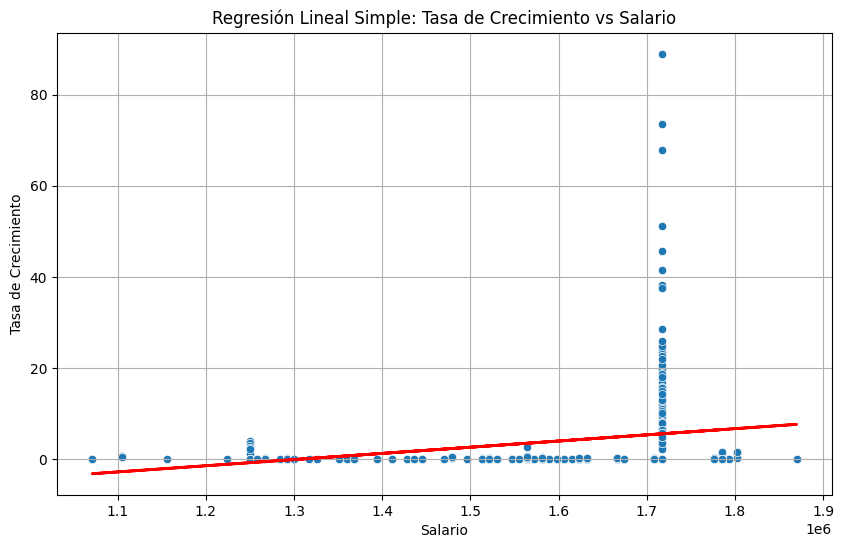


Conclusiones del análisis:
- El coeficiente de 'Salario' (0.0000) indica que por cada unidad de aumento en el salario, la tasa de crecimiento promedio aumenta/disminuye (según el signo del coeficiente) en 0.0000 unidades, manteniendo todo lo demás constante.
- El intercepto (-17.6469) representa la tasa de crecimiento promedio estimada cuando el salario es cero. Sin embargo, la interpretación del intercepto puede no tener sentido práctico si el valor de cero para 'Salario' está fuera del rango observado.
- El valor de R-cuadrado (0.0841) indica la proporción de la variabilidad en la 'Tasa_Crecimiento' que es explicada por el modelo de regresión lineal simple con 'Salario'. Un R-cuadrado más alto sugiere que el modelo se ajusta mejor a los datos.
- El p-valor asociado al coeficiente de 'Salario' (buscar en el resumen del modelo, bajo 'P>|t|') te dirá si la relación entre 'Salario' y 'Tasa_Crecimiento' es estadísticamente significativa a un cierto nivel de confianza (comúnmente 0.05). S

In [8]:
# prompt: Necesito un analisis de regresion lineal simple que la variable X sea "Salario" sea y la variable Y sea "Tasa_Crecimiento" de nuestra base de datos. dame las conclusiones. y graficalo y dame la ecuacion de la recta

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
datos = pd.read_excel('/content/drive/MyDrive/CARPETA ESTADISTICA/C3/datos_industrias.xlsx')

# Asegúrate de que las columnas 'Salario' y 'Tasa_Crecimiento' existan
# y sean de tipo numérico.

# Define las variables dependiente (Y) e independiente (X)
Y = datos['Tasa_Crecimiento']
X = datos['Salario']

# Agrega una constante a la variable independiente para el intercepto del modelo
X = sm.add_constant(X)

# Ajusta el modelo de regresión lineal simple
modelo = sm.OLS(Y, X).fit()

# Imprime el resumen del modelo (incluye coeficientes, R-cuadrado, p-valores, etc.)
print(modelo.summary())

# Obtén la ecuación de la recta
intercepto = modelo.params[0]
pendiente = modelo.params[1]
ecuacion = f'Tasa_Crecimiento = {intercepto:.4f} + {pendiente:.4f} * Salario'
print("\nEcuación de la recta:")
print(ecuacion)

# Grafica la relación entre las variables y la línea de regresión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salario', y='Tasa_Crecimiento', data=datos)
plt.plot(datos['Salario'], modelo.predict(X), color='red', linewidth=2)
plt.title('Regresión Lineal Simple: Tasa de Crecimiento vs Salario')
plt.xlabel('Salario')
plt.ylabel('Tasa de Crecimiento')
plt.grid(True)
plt.show()

# Conclusiones del análisis
print("\nConclusiones del análisis:")
print(f"- El coeficiente de 'Salario' ({pendiente:.4f}) indica que por cada unidad de aumento en el salario, la tasa de crecimiento promedio aumenta/disminuye (según el signo del coeficiente) en {abs(pendiente):.4f} unidades, manteniendo todo lo demás constante.")
print(f"- El intercepto ({intercepto:.4f}) representa la tasa de crecimiento promedio estimada cuando el salario es cero. Sin embargo, la interpretación del intercepto puede no tener sentido práctico si el valor de cero para 'Salario' está fuera del rango observado.")
print(f"- El valor de R-cuadrado ({modelo.rsquared:.4f}) indica la proporción de la variabilidad en la 'Tasa_Crecimiento' que es explicada por el modelo de regresión lineal simple con 'Salario'. Un R-cuadrado más alto sugiere que el modelo se ajusta mejor a los datos.")
print(f"- El p-valor asociado al coeficiente de 'Salario' (buscar en el resumen del modelo, bajo 'P>|t|') te dirá si la relación entre 'Salario' y 'Tasa_Crecimiento' es estadísticamente significativa a un cierto nivel de confianza (comúnmente 0.05). Si el p-valor es menor que 0.05, puedes concluir que hay una relación lineal significativa entre las dos variables.")